In [11]:
import pandas as pd

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [22]:
iris= load_iris()
X = iris.data
y = iris.target # as this is an unsupervised learning task, we will not use the target variable for training, this is just for evaluation later

In [23]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

def plot_clusters(name,X, labels, title):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=60)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\Iris_unsupervised\{name}.png")
    plt.legend(title="Cluster")
    plt.show()


K-Means Clustering

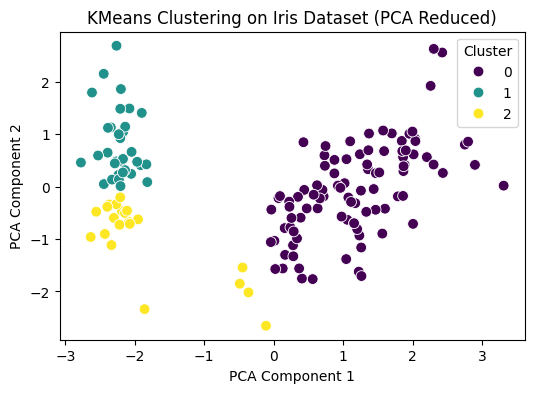

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
plot_clusters("Kmeans",X_pca, kmeans.labels_, "KMeans Clustering on Iris Dataset (PCA Reduced)")

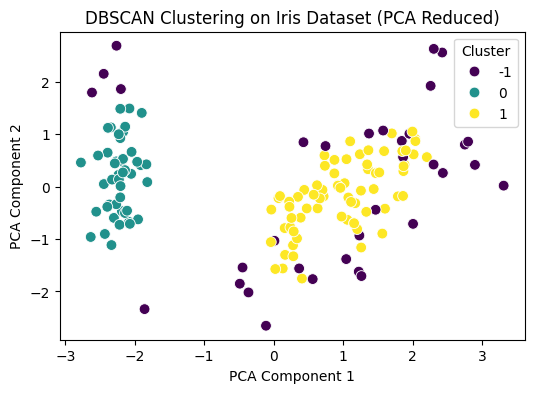

In [17]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
plot_clusters("DBSCAN", X_pca, dbscan.labels_, "DBSCAN Clustering on Iris Dataset (PCA Reduced)")

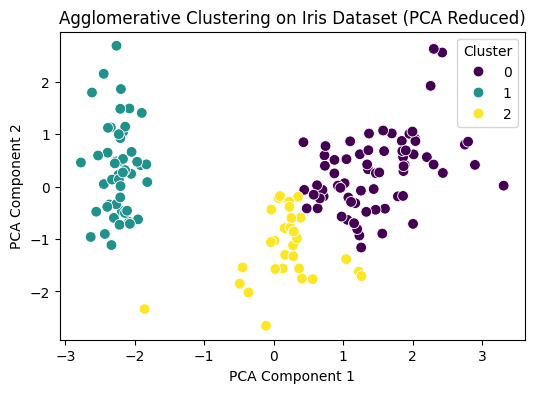

In [18]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit_predict(X_scaled)
plot_clusters("Agglomerative Clustering", X_pca, agglo.labels_, "Agglomerative Clustering on Iris Dataset (PCA Reduced)")

In [19]:
from sklearn.metrics import adjusted_rand_score, silhouette_score
#ARI tells how close clustering is to actual labels
#Silhouette tells how well-separated clusters are (0 to 1)

def evaluate_clusters(true_labels, pred_labels, name):
    ari = adjusted_rand_score(true_labels, pred_labels)
    sil = silhouette_score(X_scaled, pred_labels) if len(set(pred_labels)) > 1 else -1
    print(f"{name}:\n  Adjusted Rand Index: {ari:.3f}\n  Silhouette Score: {sil:.3f}\n")

evaluate_clusters(y, kmeans.fit_predict(X_scaled), "K-Means")
evaluate_clusters(y,dbscan.fit_predict(X_scaled), "DBSCAN")
evaluate_clusters(y, agglo.fit_predict(X_scaled), "Agglomerative")


K-Means:
  Adjusted Rand Index: 0.433
  Silhouette Score: 0.480

DBSCAN:
  Adjusted Rand Index: 0.442
  Silhouette Score: 0.357

Agglomerative:
  Adjusted Rand Index: 0.615
  Silhouette Score: 0.447

